In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

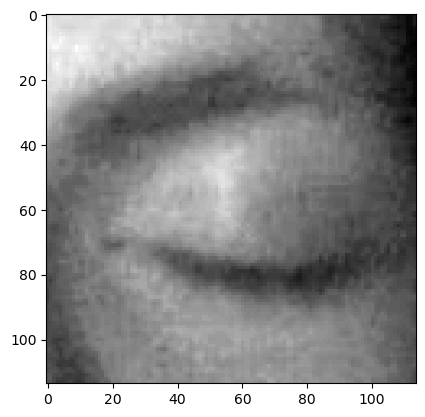

In [2]:
Datadirectory = r"Test_data/"
Classes = ["close eyes", "open eyes"]

for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

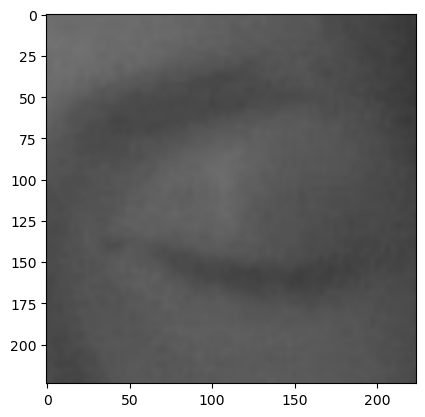

In [3]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

Reading all the images and converting them into an array for data and labels

In [5]:
Test_data = []
def create_training_Data():
   for category in Classes:
       path = os.path.join(Datadirectory, category)
       class_num = Classes.index(category) # 0 1,
       for img in os.listdir(path):
           try:
               img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
               backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
               new_array = cv2.resize(backtorgb, (img_size, img_size))
               Test_data.append([new_array,class_num])
           except Exception as e:
               pass
create_training_Data()

In [6]:
import random
random.shuffle(Test_data)

In [7]:
X = []
y = []
for features,label in Test_data:
  X.append(features)
  y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [8]:
import random
random.shuffle(Test_data)

In [9]:
x = []
y = []

for features,label in Test_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size,img_size,3)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

# Load the pre-trained MobileNet model without the top layers
model = tf.keras.applications.MobileNet(include_top=False, input_shape=(224, 224, 3))

# Define the base input and output
base_input = model.input  # MobileNet's input layer
base_output = model.layers[-1].output  # MobileNet's output before the top layers

# Add new layers on top of the base model's output
flat_layers = layers.Flatten()(base_output)
final_output = layers.Dense(1, activation='sigmoid')(flat_layers)

# Create the new model
new_model = keras.Model(inputs=base_input, outputs=final_output)

# Compile the new model
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Directory of the dataset
data_dir = 'Test_data/'  # Use forward slashes

# Set up ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create generators for training and validation sets
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,  # Adjust batch size as needed
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model using the generators
new_model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=validation_generator
)

# Save the new model
new_model.save('my2_model.keras')
print("Model saved to 'my2_model.keras'")

# Load and preprocess a sample image for prediction
def preprocess_image(image_path, img_size):
    """Preprocesses an image for prediction."""
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img_array is None:
        raise ValueError(f"Image not found at path: {image_path}")
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    new_array = cv2.resize(backtorgb, (img_size, img_size))
    X_input = np.array(new_array).reshape(1, img_size, img_size, 3) / 255.0
    return X_input

# Define image path and size
image_path = 'Test_data/close eyes/s0002_00001_0_0_0_0_0_01.png'
img_size = 224

# Preprocess image and make a prediction
X_input = preprocess_image(image_path, img_size)
prediction = new_model.predict(X_input)
print("Prediction:", prediction)


Found 2579 images belonging to 2 classes.
Found 644 images belonging to 2 classes.
Epoch 1/10


C:\Users\MY PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 317s 4s/step - accuracy: 0.9194 - loss: 0.8955 - val_accuracy: 0.4891 - val_loss: 9.2803
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 287s 4s/step - accuracy: 0.9844 - loss: 0.1701 - val_accuracy: 0.9752 - val_loss: 0.4715
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 286s 4s/step - accuracy: 0.9981 - loss: 0.0349 - val_accuracy: 0.8991 - val_loss: 1.9276
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 284s 4s/step - accuracy: 0.9972 - loss: 0.0268 - val_accuracy: 0.8913 - val_loss: 2.2706
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 286s 4s/step - accuracy: 0.9989 - loss: 0.0123 - val_accuracy: 0.9969 - val_loss: 0.0057
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 286s 4s/step - accuracy: 0.9978 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 6.1428e-07
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 289s 4s/step - accuracy: 1.0000 - loss: 2.8457e-04 - val_accuracy: 0.9984 - val_loss: 0.0283
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 301s 4s/step - accuracy: 1.0000 - loss: 2.9515e-05 - val_accuracy: 0.9984 - 

In [11]:
import tensorflow as tf
import numpy as np
import cv2
import winsound

# Load the pre-trained model
new_model = tf.keras.models.load_model('my2_model.keras')

# Sound settings for the alert
frequency = 2500  # Set frequency to 2500 Hz
duration = 1500   # Set duration to 1500 ms (1.5 seconds)

# Load the face and eye cascade classifiers
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Capture video from the webcam
cap = cv2.VideoCapture(0)  # Use 0 for the default camera
cap.set(cv2.CAP_PROP_FPS, 5)

counter = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        eyes = eyeCascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)
            eyes_roi = roi_color[ey: ey + eh, ex: ex + ew]

            # Preprocess the eye region for prediction
            final_image = cv2.resize(eyes_roi, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = final_image / 255.0

            # Make a prediction
            prediction = new_model.predict(final_image)
            print("Prediction: ", prediction)

            # Set the status based on the prediction
            if prediction >= 0.3:
                status = "Open Eyes"
                counter = 0
            else:
                status = "Closed Eyes"
                counter += 1

            # Display the status on the frame
            cv2.putText(frame, status, (150, 150), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0) if prediction >= 0.3 else (0, 0, 255), 2)

            # Trigger an alert if eyes are closed for too long
            if counter > 10:
                cv2.putText(frame, "Sleep Alert !!!", (0, 75), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                winsound.Beep(frequency, duration)
                counter = 0

    # Display the resulting frame
    cv2.imshow('Drowsiness Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the capture and destroy windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction:  [[0.0001783]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction:  [[0.87986624]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction:  [[0.05179054]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction:  [[0.15059873]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction:  [[0.00813988]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction:  [[0.00092171]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Prediction:  [[0.00409419]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prediction:  [[0.00187003]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction:  [[0.01503723]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction:  [[0.00284104]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction:  [[0.0039942]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction:  [[0.00727321]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction:  [[0.9484519]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Prediction:  [[0.9265003]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction:  [[0.01303929]]
1/1 ━━━━━━━━━━━━